# Hotel Booking EDA
This is a dataset from [Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand) and it is data that compares the data of a resort hotel and a city hotel

Most of the time, most projects won't have explanation of the data, in essence, a data dictionary won't be provided to explain the type of data you have. But fortunately in this case, we have a data dictionary

Column Data Dictionary (Data Definition)

Column_Name|Data_Definition|Data_type
-----|-----|-----
hotel|Resort Hotel / City Hotel|object
is_canceled|0 (not cancelled) / 1 (cancelled)|int
lead_time|time between booking and arrival|int
arrival_date_year|year of arrival|int
arrival_date_month|month of arrival|object
arrival_date_week_number|week of arrival|int
arrival_date_day|day of arrival|int
stays_in_weekend_nights|Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel|int
stays_in_week_nights|Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|int
adults|Number of Adults|int
children|Number of children|float
babies|Number of babies|int
meal|Type of meal booked. Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)|object
country|Country of origin|object
market_segment|Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”|object
distribution_channel|Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”|object
is_repeated_guest|Value indicating if the booking name was from a repeated guest (1) or not (0)|int
previous_cancellations|Number of previous bookings that were cancelled by the customer prior to the current booking|int
previous_bookings_not_canceled|Number of previous bookings not cancelled by the customer prior to the current booking|int
reserved_room_type|Code of room type reserved. Code is presented instead of designation for anonymity reasons.|object
assigned_room_type|Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.|object
booking_changes|Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|int
deposit_type|Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.|object
agent|ID of the travel agency that made the booking|float
company|ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons|float
days_in_waiting_list|Number of days the booking was in the waiting list before it was confirmed to the customer|int
customer_type|Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient|object
adr|Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights|object
required_car_parking_spaces|Number of car parking spaces required by the customer|int
total_of_special_requests|Number of special requests made by the customer (e.g. twin bed or high floor)|int
reservation_status|Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why|object
reservation_status_date|Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|object

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('./dataset/hotelbooking/hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [7]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

# Data Cleaning
From the above, null values and the data dictionary, we can possibly deduce that company and agent data might not be necessary as these are IDs of the entities. They could be government-issued IDs like tax registration numbers or just regular IDs that the hotels assigned<br>
Drop Rows with 0 Guests (adults = 0) - There isn't much logic in including days when guests aren't checked in<br>
Drop Rows with 0 Daily Average Rate (adr = 0)<br>
Add total guests = adults + children + babies

In [8]:
df.drop(columns=['company','agent'],inplace=True)

In [9]:
df = df[df['adults'] != 0]

In [10]:
df = df[df['adr'] >0]

Combine the date columns into a single arrival_date column with pd.to_datetime

In [11]:
df['arrival_date'] = df['arrival_date_month'] + " " + df['arrival_date_day_of_month'].astype(str) + " " + df['arrival_date_year'].astype(str)
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117182 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           117182 non-null  object        
 1   is_canceled                     117182 non-null  int64         
 2   lead_time                       117182 non-null  int64         
 3   arrival_date_year               117182 non-null  int64         
 4   arrival_date_month              117182 non-null  object        
 5   arrival_date_week_number        117182 non-null  int64         
 6   arrival_date_day_of_month       117182 non-null  int64         
 7   stays_in_weekend_nights         117182 non-null  int64         
 8   stays_in_week_nights            117182 non-null  int64         
 9   adults                          117182 non-null  int64         
 10  children                        117178 non-null  float64

In [15]:
df.drop('arrival_date_week_number',inplace=True,axis=1)

In [17]:
df['country'].mode()

0    PRT
Name: country, dtype: object

In [18]:
df.loc[df['country']=='PRT','country'].count()

46989

In [19]:
df['country'].fillna(df['country'].mode()[0],inplace=True)

In [21]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [22]:
df['children'].median()

0.0

In [23]:
df['children'].fillna(df['children'].median(),inplace=True)

In [24]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [25]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [26]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_guests
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1.0
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1.0
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2.0
5,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2.0
6,Resort Hotel,0,0,2015,July,1,0,2,2,0.0,...,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03,2015-07-01,2.0


# EDA

use sns.countplot to obtain the count of reservations of City Hotel vs Resort Hotel

Text(0, 0.5, 'Reservation Count')

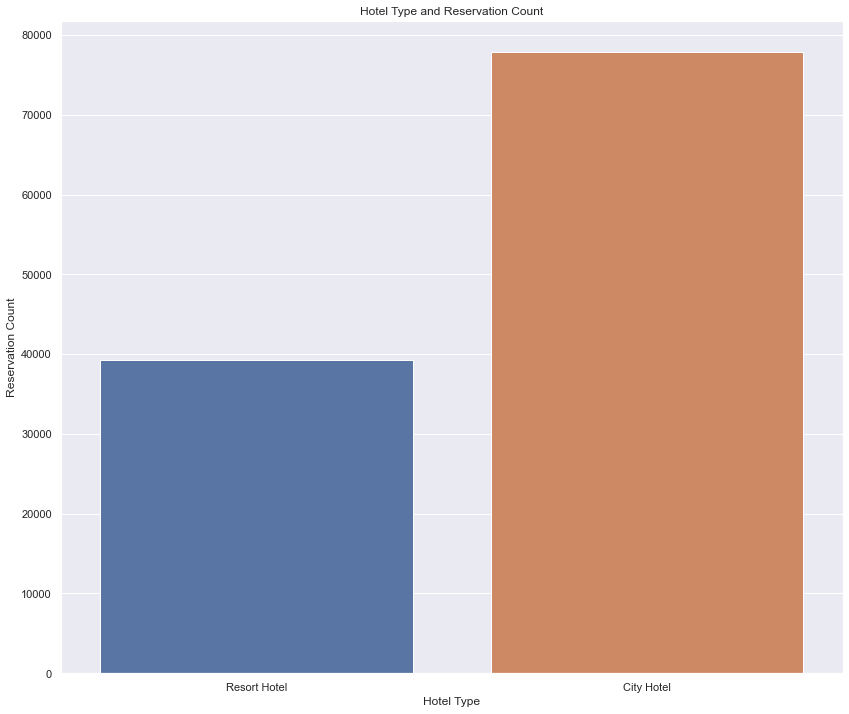

In [27]:
sns.set(rc={'figure.figsize':(14,12)})
graph = sns.countplot(x='hotel',data=df)
graph.set(title='Hotel Type and Reservation Count')
graph.set_xlabel('Hotel Type',fontsize=12)
graph.set_ylabel('Reservation Count',fontsize=12)

In [29]:
df['hotel'].value_counts(normalize=True)

City Hotel      0.664565
Resort Hotel    0.335435
Name: hotel, dtype: float64

Use sns.countplot to obtain Hotel Type and the number of Cancellations/non-cancellations

Text(0, 0.5, 'Reservation Count')

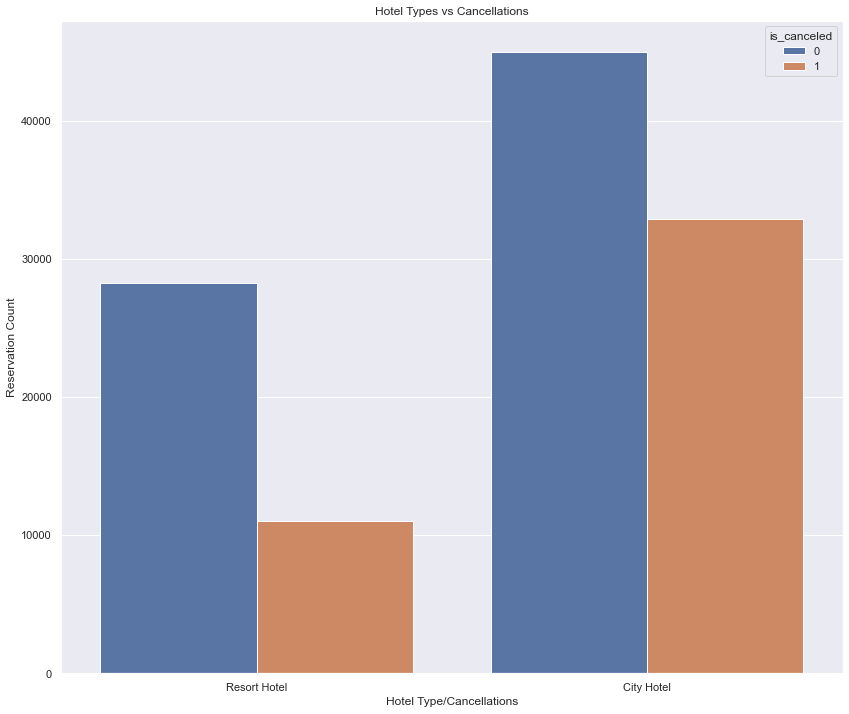

In [31]:
sns.set(rc={'figure.figsize':(14,12)})
graph = sns.countplot(x='hotel',hue='is_canceled',data=df)
graph.set(title='Hotel Types vs Cancellations')
graph.set_xlabel('Hotel Type/Cancellations',fontsize=12)
graph.set_ylabel('Reservation Count',fontsize=12)

use sns.countplot to get the number of arrivals each month for each hotel type

Text(0, 0.5, 'Count')

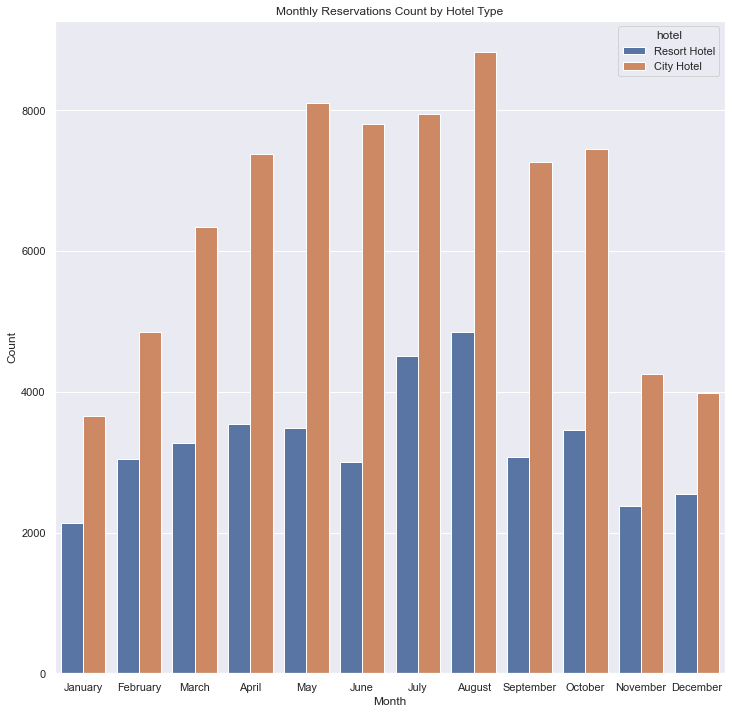

In [32]:
sns.set(rc={'figure.figsize':(12,12)})
graph = sns.countplot(x='arrival_date_month',
                      hue='hotel',
                      data=df,
                      order=["January","February","March","April","May","June","July","August","September","October","November","December"])
graph.set(title='Monthly Reservations Count by Hotel Type')
graph.set_xlabel('Month',fontsize=12)
graph.set_ylabel('Count',fontsize=12)

From the chart above, we can see that the hotel stays tend to peak during July and August for both hotels, while Winter from November to February tend do the worst.

Use sns.countplot to obtain the number of Adults reserving, and the number of Families with children reserving

Text(0, 0.5, 'Reservation Count')

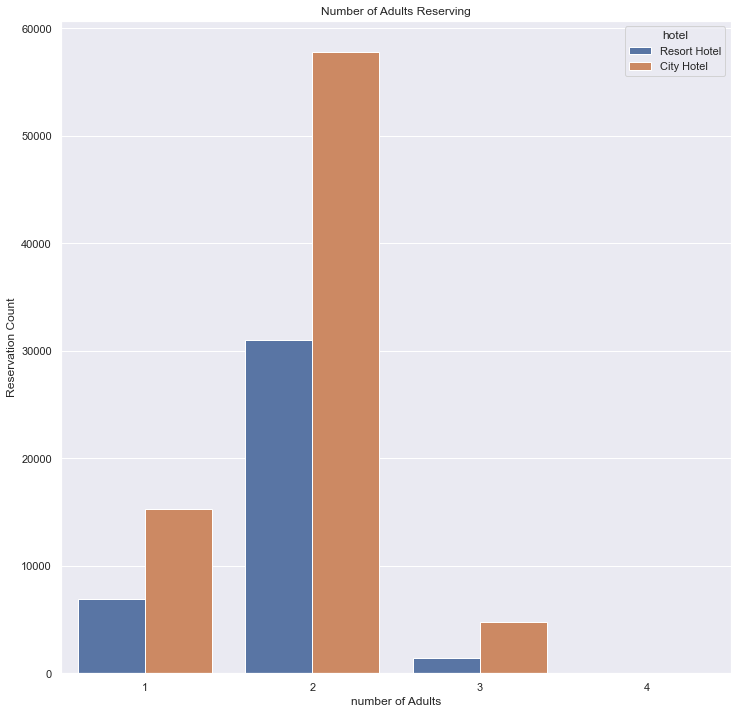

In [33]:
sns.set(rc={'figure.figsize':(12,12)})
graph = sns.countplot(x='adults',hue='hotel',data=df)
graph.set(title='Number of Adults Reserving')
graph.set_xlabel('number of Adults',fontsize=12)
graph.set_ylabel('Reservation Count',fontsize=12)

Text(0, 0.5, 'Reservation Count')

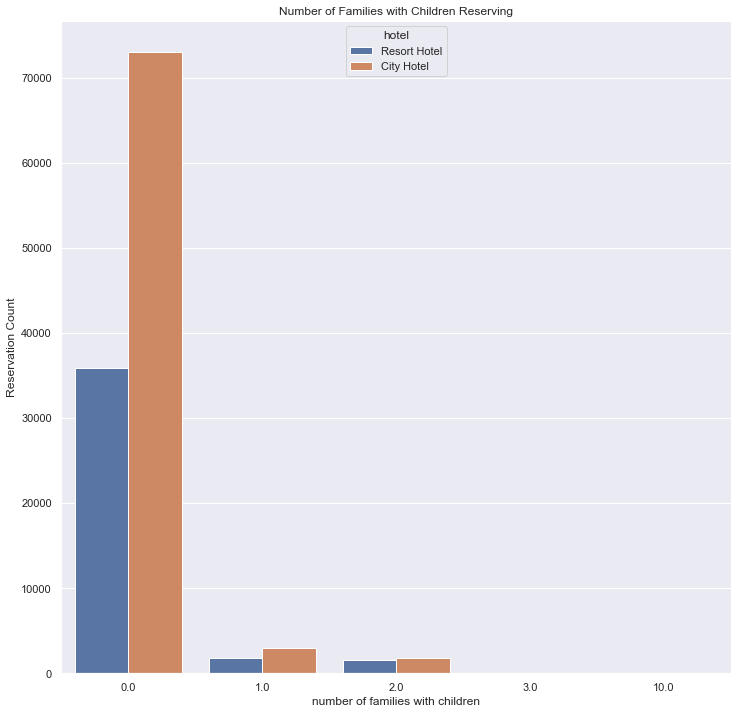

In [34]:
sns.set(rc={'figure.figsize':(12,12)})
graph = sns.countplot(x='children',hue='hotel',data=df)
graph.set(title='Number of Families with Children Reserving')
graph.set_xlabel('number of families with children',fontsize=12)
graph.set_ylabel('Reservation Count',fontsize=12)

Use Lineplot to get the guests per hotel each month during the entire time period

Text(0, 0.5, 'Total Guest Count')

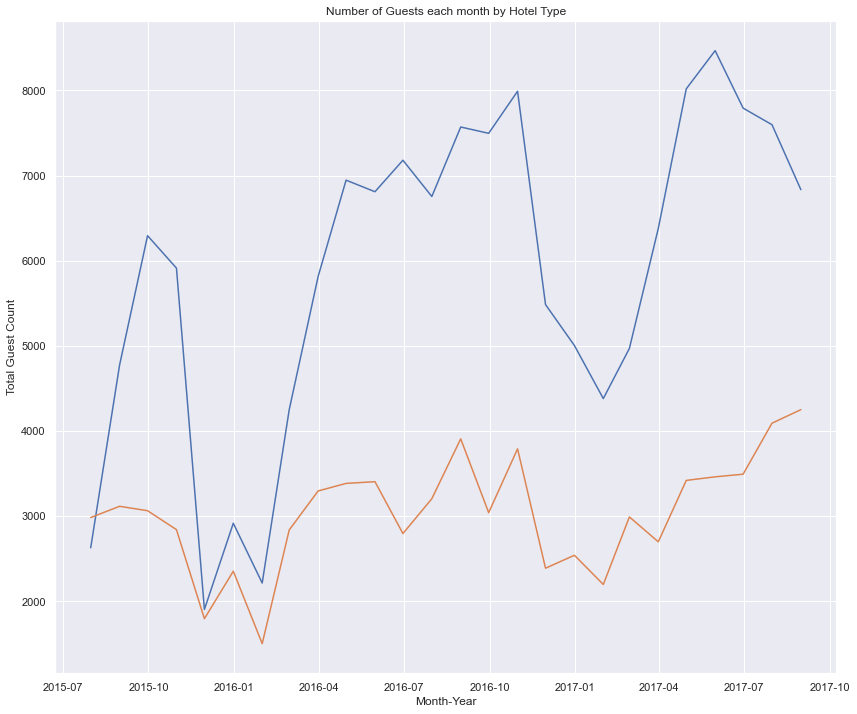

In [35]:
sns.set(rc={'figure.figsize':(14,12)})
fig, ax = plt.subplots()
sns.lineplot(
    data=df[df['hotel']=='City Hotel'].groupby(pd.Grouper(key='arrival_date', axis=0, 
                      freq='M')).sum().reset_index(), 
    x="arrival_date", 
    y="total_guests",
    ax=ax
)
sns.lineplot(
    data=df[df['hotel']=='Resort Hotel'].groupby(pd.Grouper(key='arrival_date', axis=0, 
                      freq='M')).sum().reset_index(), 
    x="arrival_date", 
    y="total_guests",
    ax=ax
)
ax.set(title="Number of Guests each month by Hotel Type")
ax.set_xlabel("Month-Year", fontsize = 12)
ax.set_ylabel("Total Guest Count", fontsize = 12)

We can notice that the number of guests coming to the City Hotel is twice that of the Resort Hotel, the graphs mirrors closely in terms in trend. However in Jan-2016, the number guests plunged to an all time low before surging back up.

Use the lineplot code above to plot the number of parking spaces needed at each otel over the time period of 2015-2017

Text(0, 0.5, 'Parking Spaces Required')

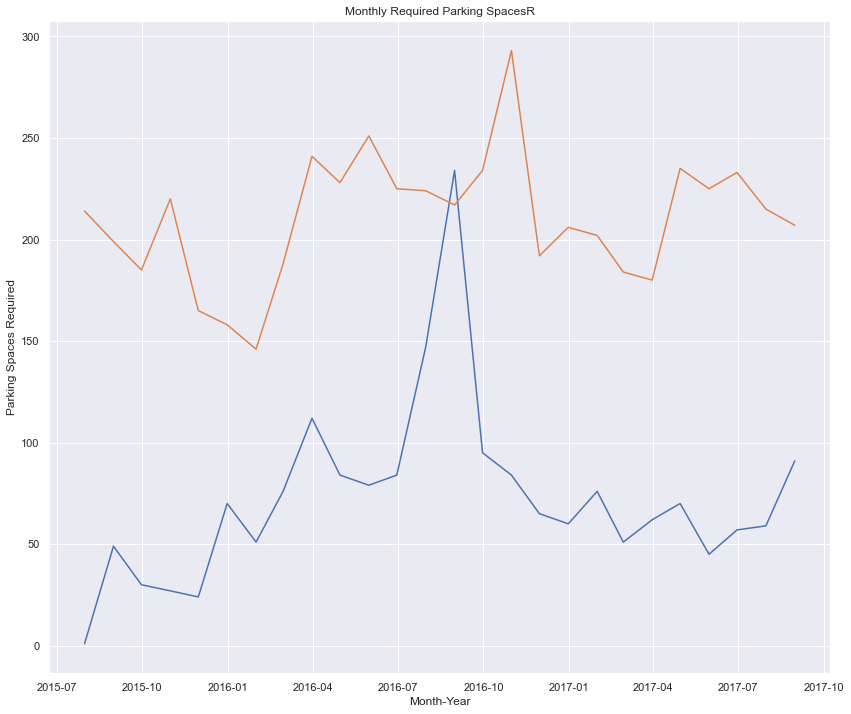

In [36]:
sns.set(rc={'figure.figsize':(14,12)})
fig, ax = plt.subplots()
sns.lineplot(
    data=df[df['hotel']=='City Hotel'].groupby(pd.Grouper(key='arrival_date', axis=0, 
                      freq='M')).sum().reset_index(), 
    x="arrival_date", 
    y="required_car_parking_spaces",
    ax=ax
)
sns.lineplot(
    data=df[df['hotel']=='Resort Hotel'].groupby(pd.Grouper(key='arrival_date', axis=0, 
                      freq='M')).sum().reset_index(), 
    x="arrival_date", 
    y="required_car_parking_spaces",
    ax=ax
)
ax.set(title="Monthly Required Parking SpacesR")
ax.set_xlabel("Month-Year", fontsize = 12)
ax.set_ylabel("Parking Spaces Required", fontsize = 12)

# EDA Conclusion
1) City Hotel has twice the amount of reservations as compared to Resort Hotel over the same period of time<br>
2) Cancellations for City Hotel as Significantly higher than Resort Hotel<br>
3) Both city and resort hotels reservations peak in August are the lowest in January. March through October seems to be their busiest window for the year. reservations fall in from November to January.<br>
4) The majority of reservations have 2 adults followed by 1 adult.<br>
5) Most Reservations are adults with 0 Children, with a small number having 1 or 2 children<br>
6) There was a surge in parking during the month of Sep 2016. City Hotel has had an average number of requests of around 200 parking spaces each month, except for Feb 2016 where it fell to 150, and November 2016 where it almost reached 300

# Recommendation
- Targeted clients would be couples during Spring, Summer and Autumn seasons as these bring the highest number of tourists with the best average daily rates.
- Hotels might want to look into parking spaces during the summer months and consider investing in having more if there is a consistent surge in requests to park.
- Resort Hotels are possible lacking in amount of customers compared to City Hotels. They might consider having more advertising to attract more customers during the peak months